In [1]:
%pip install qiskit qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.

In [2]:
%pip install qiskit

In [3]:
%pip install yfinance

In [8]:
%pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 41.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/qiskit/compiler/transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


Downloaded data columns: MultiIndex([( 'Close', 'EURUSD=X'),
            (  'High', 'EURUSD=X'),
            (   'Low', 'EURUSD=X'),
            (  'Open', 'EURUSD=X'),
            ('Volume', 'EURUSD=X')],
           names=['Price', 'Ticker'])

Target Distribution from EUR/USD returns:
0000: 0.2222
0001: 0.1111
0010: 0.1111
0011: 0.0000
0100: 0.1111
0101: 0.1111
0110: 0.1111
0111: 0.0000
1000: 0.1111
1001: 0.0000
1010: 0.0000
1011: 0.0000
1100: 0.0000
1101: 0.0000
1110: 0.0000
1111: 0.1111
Current MSE: 0.010365
Current MSE: 0.010487
Current MSE: 0.010372
Current MSE: 0.010277
Current MSE: 0.010332
Current MSE: 0.010334
Current MSE: 0.010342
Current MSE: 0.010056
Current MSE: 0.010281
Current MSE: 0.010336
Current MSE: 0.009994
Current MSE: 0.010346
Current MSE: 0.010362
Current MSE: 0.010415
Current MSE: 0.010330
Current MSE: 0.010366
Current MSE: 0.010256
Current MSE: 0.010339
Current MSE: 0.010337
Current MSE: 0.009885
Current MSE: 0.010344
Current MSE: 0.010364
Current MSE: 0.009967

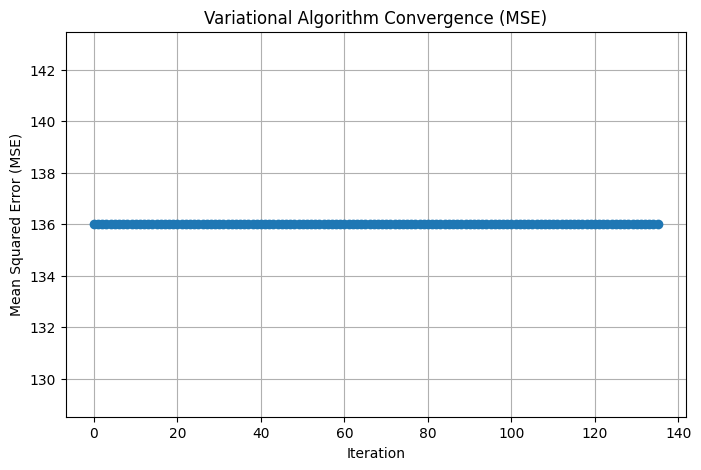


Final Optimized Distribution:
0000: 0.0491
0001: 0.0491
0010: 0.3583
0011: 0.0537
0100: 0.0066
0101: 0.0068
0110: 0.0362
0111: 0.0362
1000: 0.0436
1001: 0.0431
1010: 0.0306
1011: 0.1369
1100: 0.0189
1101: 0.0160
1110: 0.0530
1111: 0.0619


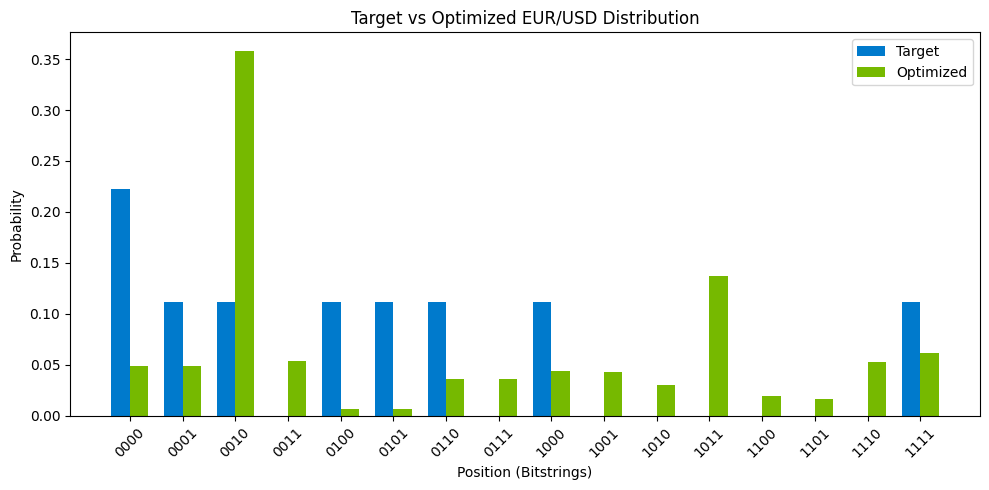

<ipython-input-13-2b6d0b8e8eaf>:223: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_closing_price = float(data['Close'].iloc[-1])


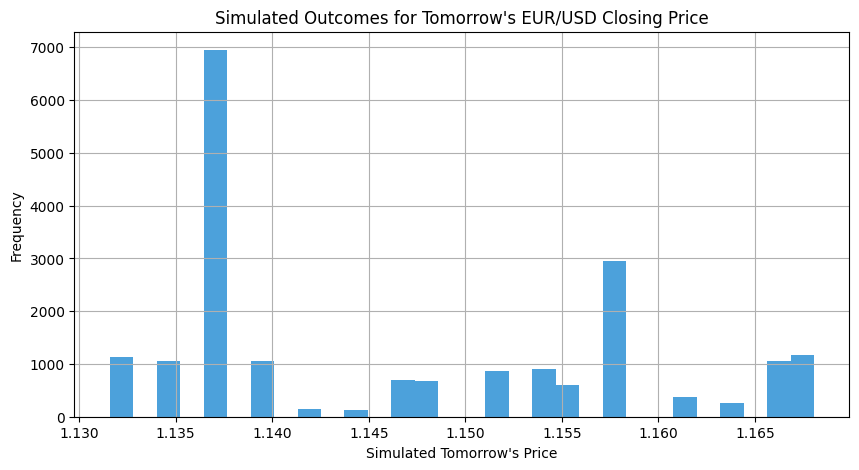

Today's Closing Price: 1.1375
Simulated Tomorrow Price Mean: 1.1464
Simulated Tomorrow Price Std Dev: 0.0118


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.optimize import minimize
from scipy.stats import wasserstein_distance

# =============================================================================
# Step 1: Download EUR/USD Data and Build the Target Distribution
# =============================================================================
ticker = "EURUSD=X"
print(f"Downloading historical data for {ticker} for the past 10 days...")
data = yf.download(ticker, period="10d", interval="1d")
print("Downloaded data columns:", data.columns)

# Compute daily returns using the 'Close' price; drop the initial NaN.
returns = data['Close'].pct_change().dropna()

# Use 16 bins (for a 4-qubit encoding: 2^4 = 16 outcomes)
num_bins = 16
bin_counts, bin_edges = np.histogram(returns, bins=num_bins)
target_probs = bin_counts / np.sum(bin_counts)
target_distribution = {format(i, '04b'): target_probs[i] for i in range(num_bins)}

print("\nTarget Distribution from EUR/USD returns:")
for bits, prob in sorted(target_distribution.items()):
    print(f"{bits}: {prob:.4f}")

# =============================================================================
# Step 2: Define INC and DEC Subcircuits
# =============================================================================
def INC_circuit():
    """Creates a subcircuit for modular increment on 4 qubits."""
    qc = QuantumCircuit(4)
    qc.mcx([1, 2, 3], 0, mode='noancilla')
    qc.mcx([2, 3], 1, mode='noancilla')
    qc.mcx([3], 2, mode='noancilla')
    qc.x(3)
    return qc

def DEC_circuit():
    """Creates a subcircuit for modular decrement on 4 qubits."""
    qc = QuantumCircuit(4)
    qc.mcx([3], 2, mode='noancilla')
    qc.mcx([2, 3], 1, mode='noancilla')
    qc.mcx([1, 2, 3], 0, mode='noancilla')
    return qc

# =============================================================================
# Step 3: Define a u3 Gate Function (Using Qiskit rotations)
# =============================================================================
def u3_gate(qc, theta, phi, lam, qubit):
    """Implements the u3 gate: u3(theta, phi, lam) = RZ(phi) -> RY(theta) -> RZ(lam)"""
    qc.rz(phi, qubit)
    qc.ry(theta, qubit)
    qc.rz(lam, qubit)

# =============================================================================
# Step 4: Build the Variational Quantum Walk Circuit (mSSQW)
# =============================================================================
def build_mSSQW_circuit(parameters, num_time_steps=8, num_split_steps=4):
    """
    Constructs a Qiskit circuit corresponding to the variational quantum walk.
    There are 4 walker qubits and 1 coin qubit (total 5 qubits).
    For each time and split step, parameters (theta, phi, lam) are used to
    rotate the coin qubit and then apply controlled INC/DEC subcircuits.
    """
    walker = QuantumRegister(4, 'walker')
    coin = QuantumRegister(1, 'coin')
    cbit = ClassicalRegister(4, 'c')
    qc = QuantumCircuit(walker, coin, cbit)

    # Prepare coin qubit in superposition.
    qc.h(coin[0])

    # Build INC and DEC subcircuits and obtain controlled versions.
    inc_subcirc = INC_circuit()
    controlled_INC = inc_subcirc.control(1, label="cINC")
    dec_subcirc = DEC_circuit()
    controlled_DEC = dec_subcirc.control(1, label="cDEC")

    # Loop over time steps and split steps.
    for t in range(num_time_steps):
        for s in range(num_split_steps):
            idx = t * num_split_steps * 3 + s * 3
            theta = parameters[idx]
            phi   = parameters[idx+1]
            lam   = parameters[idx+2]
            # Apply the parameterized u3 gate on the coin qubit.
            u3_gate(qc, theta, phi, lam, coin[0])
            # Append controlled INC.
            qc.append(controlled_INC, qargs=[coin[0]] + list(walker))
            # Flip coin.
            qc.x(coin[0])
            # Append controlled DEC.
            qc.append(controlled_DEC, qargs=[coin[0]] + list(walker))
            # Flip coin back.
            qc.x(coin[0])

    # Measure the walker qubits.
    qc.measure(walker, cbit)
    return qc

# =============================================================================
# Step 5: Utility Functions for Processing Results
# =============================================================================
def get_sampled_distribution(counts, num_qubits=4):
    """Converts Qiskit's counts dict into a normalized probability distribution
    over the walker qubits (using only the last num_qubits bits)."""
    distribution = {}
    total = sum(counts.values())
    for bitstring, count in counts.items():
        if len(bitstring) > num_qubits:
            bitstring = bitstring[-num_qubits:]
        distribution[bitstring] = count / total
    return distribution

def plot_distribution(target, optimized, title="Distribution Comparison"):
    positions = sorted(target.keys())
    target_vals = [target[pos] for pos in positions]
    optimized_vals = [optimized.get(pos, 0) for pos in positions]
    x_vals = np.arange(len(positions))
    width = 0.35
    plt.figure(figsize=(10, 5))
    plt.bar(x_vals - width/2, target_vals, width, label="Target", color="#007ACC")
    plt.bar(x_vals + width/2, optimized_vals, width, label="Optimized", color="#76B900")
    plt.xticks(x_vals, positions, rotation=45)
    plt.xlabel("Position (Bitstrings)")
    plt.ylabel("Probability")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_mse(sampled, target):
    mse = 0.0
    for key in target:
        s_val = sampled.get(key, 0)
        t_val = target[key]
        mse += (s_val - t_val)**2
    mse /= len(target)
    return mse

# =============================================================================
# Step 6: Define the Cost Function and Optimize the Parameters
# =============================================================================
def cost_function(parameters, num_time_steps=8, num_split_steps=4, num_qubits=4, shots=200000):
    qc = build_mSSQW_circuit(parameters, num_time_steps, num_split_steps)
    simulator = AerSimulator()
    # Transpile the circuit to a common basis.
    qc_transpiled = transpile(qc, backend=simulator, basis_gates=["u3", "cx", "h", "rz", "ry", "x", "mcx"])
    job = simulator.run(qc_transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts(qc_transpiled)
    sampled_distribution = get_sampled_distribution(counts, num_qubits)
    mse = calculate_mse(sampled_distribution, target_distribution)
    print(f"Current MSE: {mse:.6f}")
    return mse

# =============================================================================
# Optimization
# =============================================================================
num_time_steps = 8
num_split_steps = 4
num_qubits = 4
initial_theta, initial_phi, initial_lam = np.pi/2, 0, 0
flat_parameters = np.array([initial_theta, initial_phi, initial_lam] * (num_time_steps * num_split_steps))

opt_result = minimize(cost_function, flat_parameters,
                      args=(num_time_steps, num_split_steps, num_qubits, 200000),
                      method="Nelder-Mead", options={"maxiter": 40})
print("\nOptimized Result:")
print("Minimum cost (MSE):", opt_result.fun)
optimized_parameters = opt_result.x
print("Optimized Parameters (flat):", optimized_parameters)

plt.figure(figsize=(8, 5))
plt.title("Variational Algorithm Convergence (MSE)")
plt.plot(opt_result.nfev * np.ones(opt_result.nfev), 'o-')  # For visualization if you log cost history externally.
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

# =============================================================================
# Step 7: Evaluate the Final Optimized Distribution and Plot Comparison
# =============================================================================
qc_final = build_mSSQW_circuit(optimized_parameters, num_time_steps, num_split_steps)
simulator = AerSimulator()
qc_final_transpiled = transpile(qc_final, backend=simulator, basis_gates=["u3", "cx", "h", "rz", "ry", "x", "mcx"])
job_final = simulator.run(qc_final_transpiled, shots=10000)
result_final = job_final.result()
counts_final = result_final.get_counts(qc_final_transpiled)
sampled_distribution_optimized = get_sampled_distribution(counts_final, num_qubits)

print("\nFinal Optimized Distribution:")
for bits, prob in sorted(sampled_distribution_optimized.items()):
    print(f"{bits}: {prob:.4f}")

plot_distribution(target_distribution, sampled_distribution_optimized,
                  title="Target vs Optimized EUR/USD Distribution")

# =============================================================================
# Step 8: Simulate Tomorrow's Price Outcomes Using the Sampled Returns
# =============================================================================
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

job_sim = simulator.run(qc_final_transpiled, shots=20000)
result_sim = job_sim.result()
counts_sim = result_sim.get_counts(qc_final_transpiled)
simulated_returns = []
for bitstring, count in counts_sim.items():
    if len(bitstring) > num_qubits:
        bitstring = bitstring[-num_qubits:]
    bin_index = int(bitstring, 2)
    rep_return = bin_midpoints[bin_index]
    simulated_returns.extend([rep_return] * count)
simulated_returns = np.array(simulated_returns)

today_closing_price = float(data['Close'].iloc[-1])
simulated_tomorrow_prices = today_closing_price * (1 + simulated_returns)

plt.figure(figsize=(10, 5))
plt.hist(simulated_tomorrow_prices, bins=30, color="#007ACC", alpha=0.7)
plt.xlabel("Simulated Tomorrow's Price")
plt.ylabel("Frequency")
plt.title("Simulated Outcomes for Tomorrow's EUR/USD Closing Price")
plt.grid(True)
plt.show()

print("Today's Closing Price: {:.4f}".format(today_closing_price))
print("Simulated Tomorrow Price Mean: {:.4f}".format(simulated_tomorrow_prices.mean()))
print("Simulated Tomorrow Price Std Dev: {:.4f}".format(simulated_tomorrow_prices.std()))